## Deep Learning - Master in Artificial Intelligence (UDC)
Date: 20/03/2025

Authors:

Paula Biderman Mato

Celia Hermoso Soto

In [2]:
import keras

In [3]:
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import layers
import visualkeras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import RandomFlip, RandomRotation, RandomZoom

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

In [5]:
def plot(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "b-o", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "r--o", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "b-o", label="Training loss")
    plt.plot(epochs, val_loss, "r--o", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

## 1.3. MobileNetV2
* We will use the MobileNetV2 architecture proposed by Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov and Liang-Chieh Chen.
* This architecture was also trained with ImageNet, so it has 1000 different classes.
* It has been developed to mobile applications and embedded systems. It uses inverted residual blocks and linear bottlenecks for efficiency.
* It is faster and lighter than RestNet.

In [7]:
# Instantiating the MobileNetv2 convolutional base
conv_base_mobileNetV2 = keras.applications.MobileNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = (224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
conv_base_mobileNetV2.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

C:\Python3\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


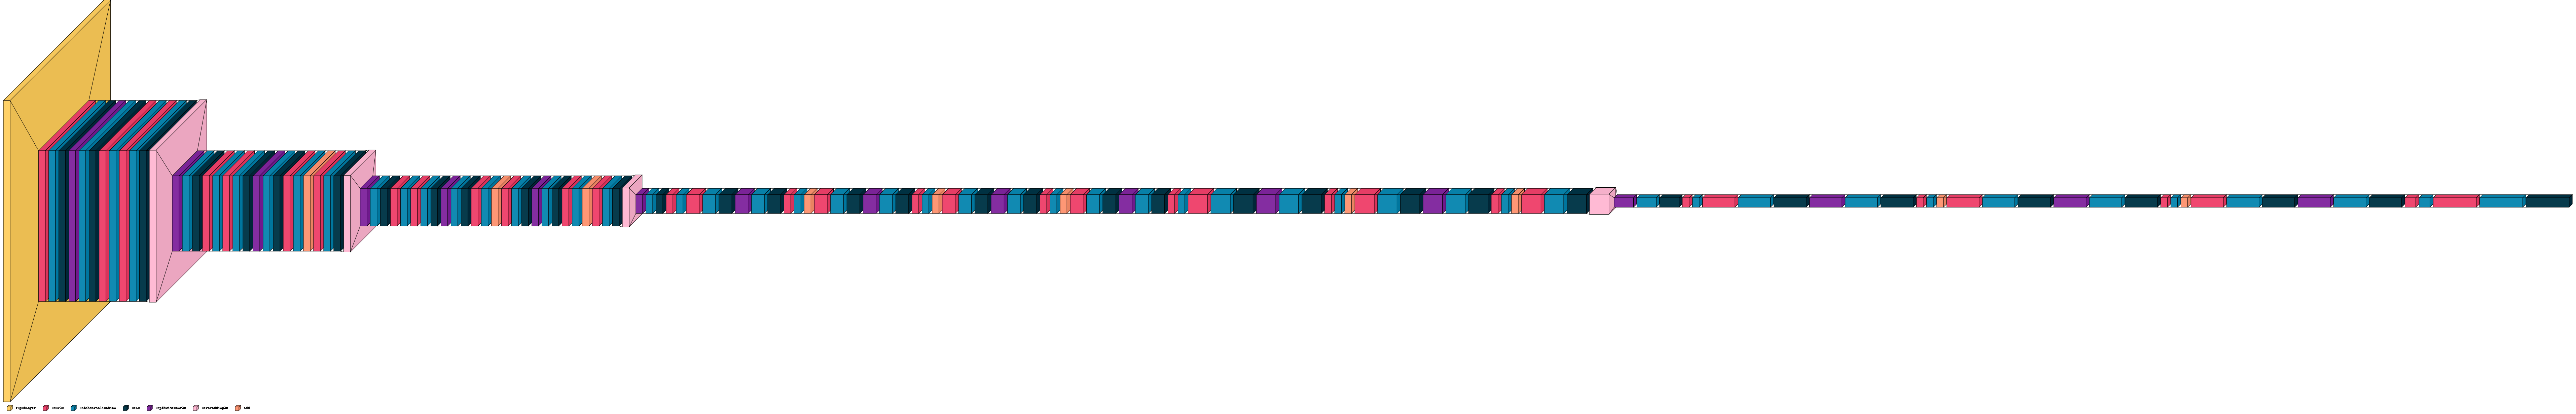

In [9]:
visualkeras.layered_view(conv_base_mobileNetV2, legend = True)

### 1.2.0. Fast feature extraction without data augmentation (MobileNetV2)

In [ ]:
import tensorflow as tf
import numpy as np
from keras.applications.mobilenet_v2 import preprocess_input

def get_features_and_labels_mobileNetV2(images, labels, batch_size=32):
    images = np.array(images)
    labels = np.array(labels)

    features_list = []

    for i in range(0, len(images), batch_size):
        batch_images = images[i:i+batch_size]
        resized_batch = tf.image.resize(batch_images, (224, 224))
        preprocessed_batch = preprocess_input(resized_batch.numpy())
        batch_features = conv_base_mobileNetV2.predict(preprocessed_batch, batch_size=batch_size, verbose=1)  
        features_list.append(batch_features)

    features = np.concatenate(features_list, axis=0)

    return features, labels

train_features, t_labels = get_features_and_labels_mobileNetV2(train_images, train_labels)
val_features, v_labels = get_features_and_labels_mobileNetV2(validation_images, validation_labels)
test_features, test_labels = get_features_and_labels_mobileNetV2(test_images, test_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [15]:
print(train_features.shape, t_labels.shape)
print(val_features.shape, v_labels.shape)
print(test_features.shape, test_labels.shape)

NameError: name 'train_features' is not defined

In [ ]:
num_classes = 20

t_labels = to_categorical(t_labels, num_classes)
v_labels = to_categorical(v_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(t_labels.shape)
print(v_labels.shape)
print(test_labels.shape)

In [ ]:
inputs = keras.Input(shape=(1, 1, 1280))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(20, activation="softmax")(x)
model_mobilnet_v2 = keras.Model(inputs, x)
model_mobilnet_v2.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.AdamW(learning_rate=0.0001),
                     metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/MobileNetV2_feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=20,
        restore_best_weights=True
    )
]

print("Forma de train_features:", train_features.shape)
print("Forma esperada por el modelo:", model_mobilnet_v2.input_shape)

history = model_mobilnet_v2.fit(
    train_features, t_labels,
    epochs=100,
    validation_data=(val_features, v_labels),
    callbacks=callbacks)

Forma de train_features: (40000, 1, 1, 1280)
Forma esperada por el modelo: (None, 1, 1, 1280)
Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.0848 - loss: 2.9560 - val_accuracy: 0.1517 - val_loss: 2.8347
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.1537 - loss: 2.8151 - val_accuracy: 0.1728 - val_loss: 2.7460
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1770 - loss: 2.7353 - val_accuracy: 0.1785 - val_loss: 2.7054
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1832 - loss: 2.6965 - val_accuracy: 0.1826 - val_loss: 2.6826
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1898 - loss: 2.6694 - val_accuracy: 0.1832 - val_loss: 2.6660
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1954 - loss: 2.6454 - val_accuracy: 0.1872 - val_loss: 2.6543
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.1971 - loss: 2.6378 - val_accuracy: 0

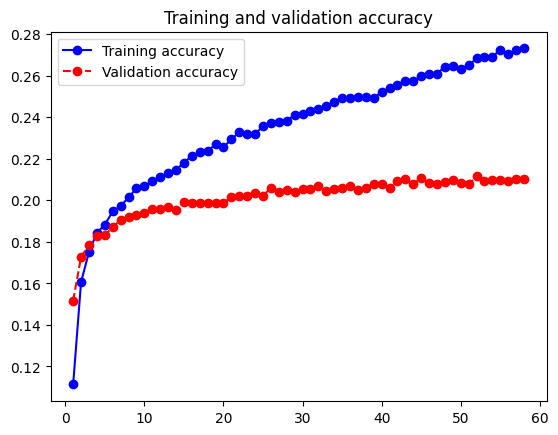

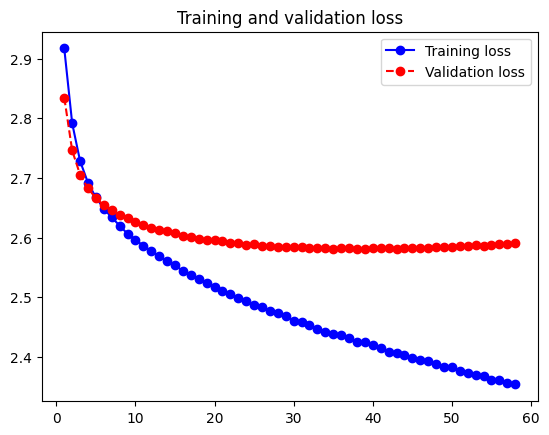

In [ ]:
plot(history)

### 1.2.1. Feature extraction together with data augmentation (MobileNetV2)


In [18]:
conv_base_mobileNetV2 = keras.applications.MobileNetV2(
    weights = "imagenet",
    include_top = False)

<ipython-input-18-1530c657646d>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base_mobileNetV2 = keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
conv_base_mobileNetV2.trainable = False

In [20]:
conv_base_mobileNetV2.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [21]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.layers.Resizing(224, 224, interpolation="bilinear")(x)  # Mantiene los 3 canales
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = conv_base_mobileNetV2(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(20, activation="softmax")(x)  # Ajustado para 20 clases de CIFAR-100

model_mobilnet_v2 = keras.Model(inputs, outputs)
model_mobilnet_v2.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

In [22]:
num_classes = 20

train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/MobileNetV2_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]
history = model_mobilnet_v2.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(validation_images, validation_labels),
    callbacks=callbacks)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 67ms/step - accuracy: 0.2435 - loss: 2.5100 - val_accuracy: 0.5607 - val_loss: 1.4370
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - accuracy: 0.4028 - loss: 1.9388 - val_accuracy: 0.5964 - val_loss: 1.3453
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 63ms/step - accuracy: 0.4301 - loss: 1.8546 - val_accuracy: 0.5934 - val_loss: 1.3470
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.4460 - loss: 1.8005 - val_accuracy: 0.6157 - val_loss: 1.3043
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 69ms/step - accuracy: 0.4583 - loss: 1.7580 - val_accuracy: 0.6277 - val_loss: 1.2825
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.4640 - loss: 1.7579 - val_accuracy: 0.6471 - val_loss: 1.2654
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.4657 - loss: 1.7360 - val_accuracy: 0.6428 - val_loss: 1.2343
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 64ms/step - accuracy: 0.478

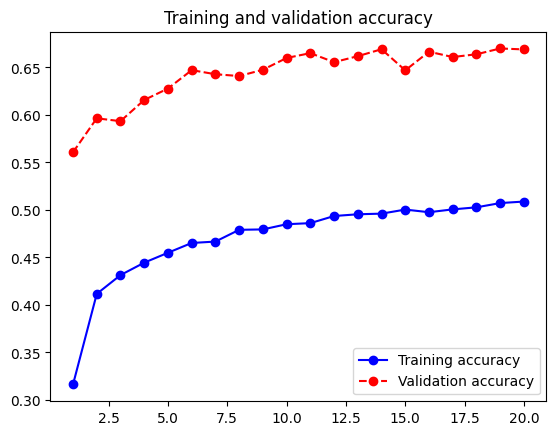

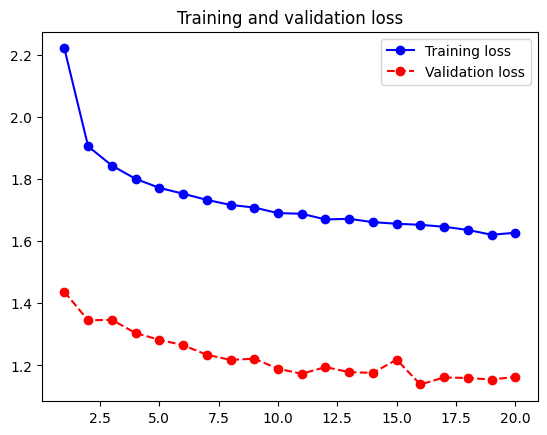

In [26]:
plot(history)

In [7]:
import os

print("¿El modelo existe?", os.path.exists("models/MobileNetV2_with_augmentation.keras"))


¿El modelo existe? True


In [8]:
test_model = keras.models.load_model("models/MobileNetV2_with_augmentation.keras")

print("Forma esperada por el modelo:", test_model.input_shape)
print("Forma de test_images:", test_images.shape)
print("Forma de test_labels:", test_labels.shape)

Forma esperada por el modelo: (None, 32, 32, 3)
Forma de test_images: (10000, 32, 32, 3)
Forma de test_labels: (10000, 1)


In [10]:
num_classes = 20
test_labels = to_categorical(test_labels, num_classes)

test_model = keras.models.load_model("models/MobileNetV2_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.6612 - loss: 1.1380
Test accuracy: 0.663


After we do the data augmentation using mobilenetv2 networks we can see that the accuracy has grow considerably compare to the previous model reaching near 67% accuracy.

In [18]:
from tensorflow.keras.utils import to_categorical

num_classes = 20  # CIFAR-100 con coarse labels tiene 20 clases

# Convertir etiquetas de (40000,1) → (40000, 20)
train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)

# Verificar que la conversión es correcta
print("Nueva forma de train_labels:", train_labels.shape)
print("Nueva forma de validation_labels:", validation_labels.shape)


Nueva forma de train_labels: (40000, 20)
Nueva forma de validation_labels: (10000, 20)


### 1.0.2. Fine-tuning


In [19]:
# Cargar el modelo guardado con data aug
model_mobilnet_v2 = keras.models.load_model("models/MobileNetV2_with_augmentation.keras")

# Descongelar SOLO las últimas 30 capas
for layer in model_mobilnet_v2.layers[-30:]:
    layer.trainable = True

# Reducir la tasa de aprendizaje para evitar que el modelo desaprenda lo aprendido en ImageNet
model_mobilnet_v2.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  #LR bajo para estabilidad
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/MobileNetV2_fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]
history_finetune = model_mobilnet_v2.fit(
    train_images, train_labels,
    epochs=30,
    validation_data=(validation_images, validation_labels),
    callbacks=callbacks)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 372s 271ms/step - accuracy: 0.3030 - loss: 2.4201 - val_accuracy: 0.4263 - val_loss: 1.9650
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 337s 270ms/step - accuracy: 0.4426 - loss: 1.8492 - val_accuracy: 0.5430 - val_loss: 1.5323
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 376s 265ms/step - accuracy: 0.4955 - loss: 1.6700 - val_accuracy: 0.5942 - val_loss: 1.3445
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 331s 265ms/step - accuracy: 0.5319 - loss: 1.5479 - val_accuracy: 0.6613 - val_loss: 1.1476
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 331s 265ms/step - accuracy: 0.5494 - loss: 1.4843 - val_accuracy: 0.6890 - val_loss: 1.0538
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 382s 265ms/step - accuracy: 0.5679 - loss: 1.4234 - val_accuracy: 0.6996 - val_loss: 1.0138
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 331s 265ms/step - accuracy: 0.5914 - loss: 1.3462 - val_accuracy: 0.7131 - val_loss: 0.9693
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 388s 269ms/step - ac

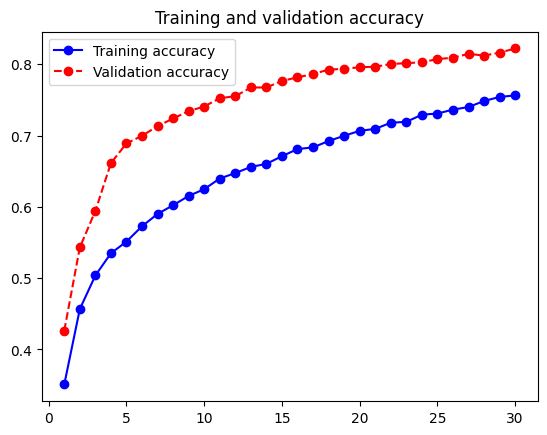

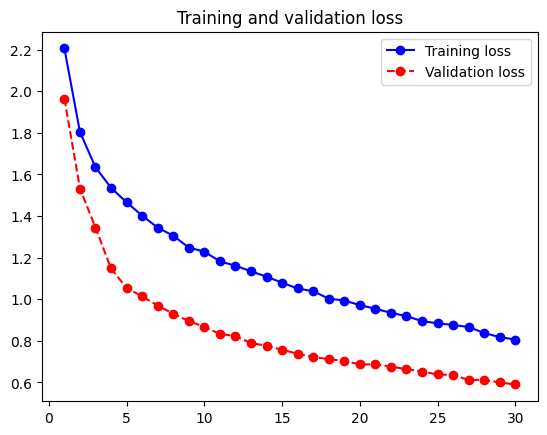

In [20]:
plot(history_finetune)

# **Interpretation of MOBILENETV2 Results**

In [11]:
import pandas as pd
data = {
    "Model": ["Fine-Tuning", "Data Augmentation", "No Adjustments"],
    "Training Accuracy": ["~70%", "~50%", "~27%"],
    "Validation Accuracy": ["~80%", "~66%", "~21%"],
    "Validation Loss": ["~0.6", "~1.2", "~2.6"],
    "Observation": [
        "Best learning & generalization",
        "Good generalization but lower accuracy",
        "Fails to learn, stagnates"
    ]
}

df = pd.DataFrame(data)

from IPython.display import display
display(df)

,Model,Training Accuracy,Validation Accuracy,Validation Loss,Observation
0,Fine-Tuning,~70%,~80%,~0.6,Best learning & generalization
1,Data Augmentation,~50%,~66%,~1.2,Good generalization but lower accuracy
2,No Adjustments,~27%,~21%,~2.6,"Fails to learn, stagnates"


Seeing the results present above, Fine-Tuning is the best strategy, achieving the highest accuracy and lowest loss and it could even improve if we have more time to training it. DataAugmentation improves performance but is still inferior to Fine Tuning.  And MobileNetV2 without adjustments performs poorly and is not suitable for this dataset.